In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import animation as am
from matplotlib import cm
from scipy.integrate import ode 
from kuramoto import * # import the kuramoto classes from file 
from utils import *
from scipy import stats, optimize
from matplotlib import cm

## This notebook contains code for both running the simulation and plotting the data. To run the simulations, run all the cells. To plot the data with the saved .npy files, simply run the cells that load the data, followed by the cells that plot them. 

## First, we do some 1D simulations.  

In [3]:
# Set up model parameters 
epsilon = 1
eta = 0.7
sigma = 1
mean_omega = 0
alpha = 0.3


# Set up simulation parameters 
L = 200
T = 1e3 # total time of the simulation 
n_frames = T # number of time points recorded in the end 
grad = 1.3
grad = [-grad, grad]
init = np.zeros(L)

seeds = [None]*4

data = [] 
omegas = [] 
models = [] 


# Initialise the model and run the simulation 

sigmas = [0.93]
etas = [-0.59]

data = [] 
for sigma in sigmas: 
    for eta in etas: 
        for seed in seeds: 
            model = KuramotoNNN(epsilon, eta, sigma, mean_omega, alpha, BC='grad', grad=grad)
            model.initialise(L, T, n_frames, init=init, seed=seed)
            model.evolve() 
    
            phases = np.copy(model.res[-1]) % (2*np.pi)
            shift(phases)
            data.append(phases)

100%|███████████████████████████████████████| 1000/1000 [00:27<00:00, 36.33it/s]


In [4]:
np.save('Sims/NNN_sigma={}_eta={}_samples.npy'.format(sigma, eta), data)

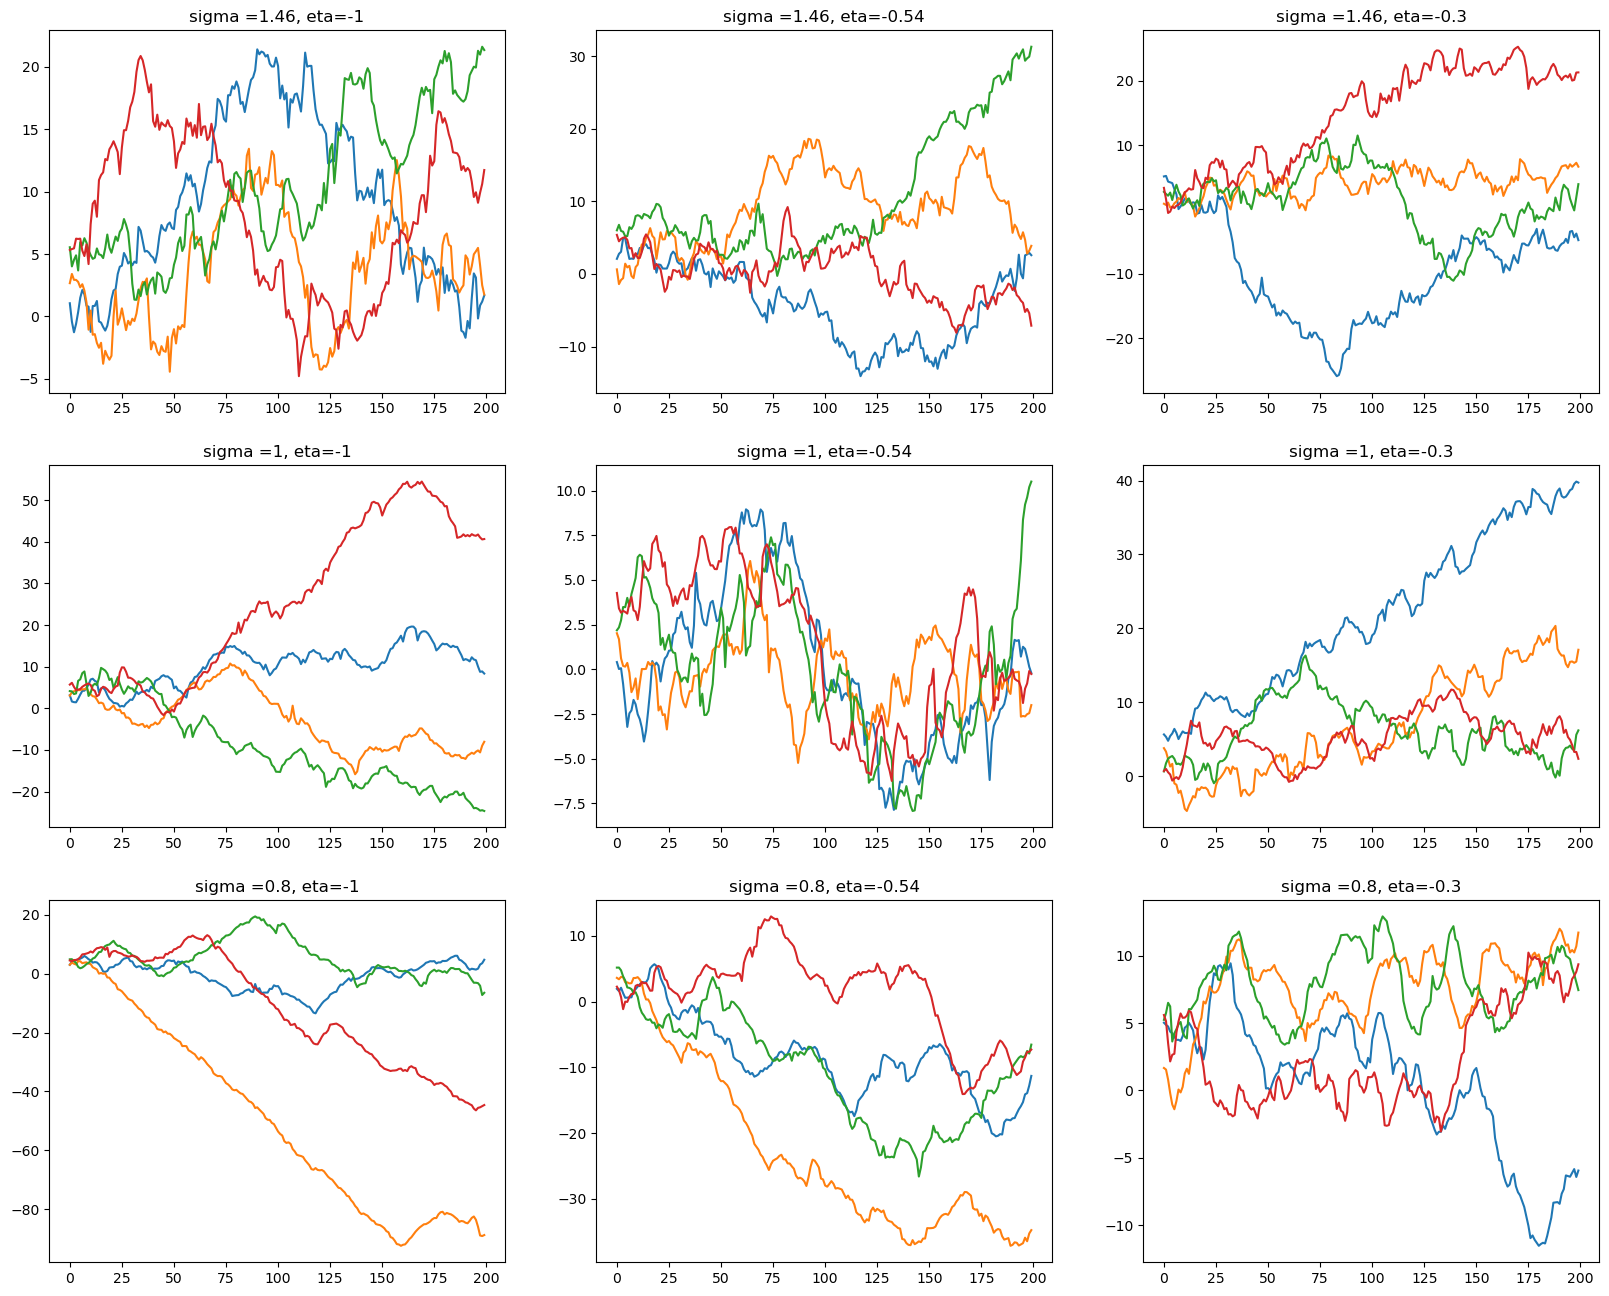

In [ ]:
fig, axes = plt.subplots(len(sigmas), len(etas), figsize=(20, 16)) 

i = 0 
for (a, sigma) in enumerate(sigmas):
    for (b, eta) in enumerate(etas): 
        for seed in seeds: 
            theta = data[i] 
            axes[a, b].plot(data[i])
            i += 1
        axes[a, b].set_title('sigma ={}, eta={}'.format(sigma, eta))
plt.show() 

## Multiple simulations of the MAP parameters 

In [33]:
epsilon = 1
eta = -0.44
sigmas = [0, 0.25, 0.3, 0.35]
mean_omega = 0


# Set up simulation parameters 
L = 200
T = 5e4 # total time of the simulation 
n_frames = T # number of time points recorded in the end 
grad = 1.3
grads = [-grad, grad]

seed = 100 

data = [] 
omegas = [] 
models = [] 


for sigma in sigmas: 
    # Initialise the model and run the simulation 
    init = np.zeros(L)
    model = Kuramoto(epsilon, eta, sigma, mean_omega, BC='grad', grad=grads)
    model.initialise(L, T, n_frames, init=init, seed=seed) 
    model.evolve() # this runs the simulation, set verbose to True to see output at every time step 
    
    phases = np.copy(model.res[-1]) % (2*np.pi)
    shift(phases)
    data.append(phases)
    omegas.append(model.omegas) 
    models.append(model) 

100%|█████████████████████████████████████████████████████████████████████| 50000/50000 [01:48<00:00, 462.25it/s]


/var/folders/5n/0rvnm9350db7gk5vdnj3tn6h0000gn/T/ipykernel_95982/2525416383.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('copper')


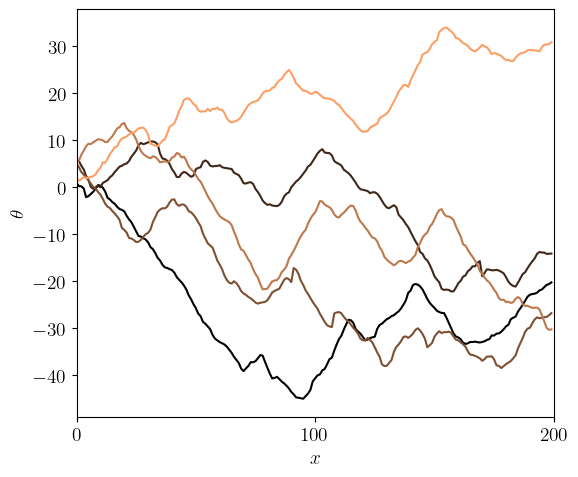

In [4]:
cmap = cm.get_cmap('copper')
fig = plt.figure(figsize=(6, 5))
plt.rc('text', usetex=True)
plt.rc('font', size=14, family='serif')

for i in range(f):
    plt.plot(data[i], color=cmap(i/f))

plt.ylabel(r'$\theta$')
plt.xlim([0, L-1])
plt.xlabel(r'$x$')
plt.xticks([0, 100, 200])
plt.tight_layout()
plt.savefig('Figures/corrected_map_sim_overlap.pdf')
plt.show() 

## Kymograph 

In [12]:
epsilon = 1
eta = -0.44
sigma = 0.35
mean_omega = 0
seed=1

# Set up simulation parameters 
L = 160
T = 1e4 # total time of the simulation 
n_frames = T*10 # number of time points recorded in the end 
grad = 1.3
grads = [-grad, grad]
init = np.zeros(L)
model = Kuramoto(epsilon, eta, sigma, mean_omega, BC='grad', grad=grads)
model.initialise(L, T, n_frames, init=init, seed=seed) 
model.evolve() 
res = model.res % (2*np.pi)

100%|█████████████████████████████████████████████████████████████████| 100000/100000 [00:02<00:00, 35742.85it/s]


In [13]:
np.save('Sims/data_sigma={}_eta={}.npy'.format(sigma, eta), res)

In [13]:
eta = -0.44
sigma = 0.35
res = np.load('Sims/data_sigma={}_eta={}.npy'.format(sigma, eta)) %(2*np.pi)

0.3653014713476504


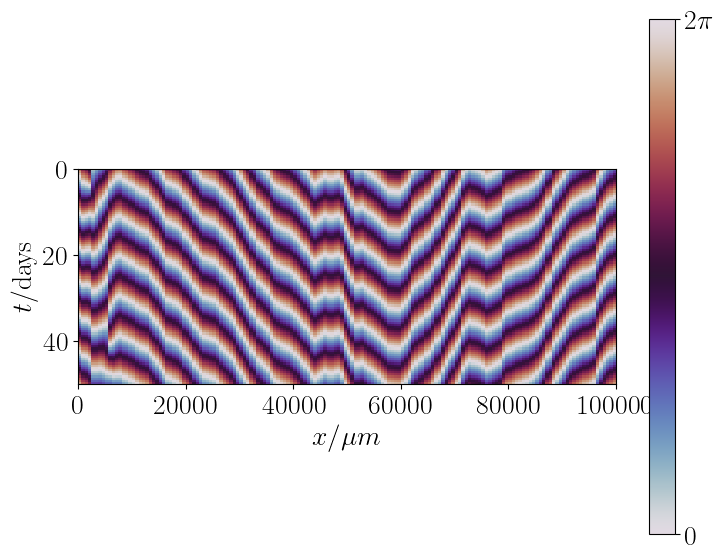

In [14]:
N = 100
epsilon = 0.2
scale= 10
omega_extra = 2*np.pi/8.6/epsilon/scale
print(omega_extra)

phases = np.copy(res[-N:, :])
phases += np.arange(N)[:, np.newaxis]*omega_extra

plt.figure(figsize=(8, 6))
plt.rc('font', size=20)
plt.rc('text', usetex=True)
im = plt.imshow(phases %(2*np.pi), cmap='twilight', interpolation='none', vmin=0, vmax=2*np.pi, extent=[0, L*500, N/scale/epsilon, 0], aspect=800)
cbar = plt.colorbar(im)
cbar.set_ticks([0, 2*np.pi])
cbar.set_ticklabels([r'$0$', r'$2\pi$'])
plt.xlabel(r'$x/\mu m$')
plt.ylabel(r'$t$/days')
plt.tight_layout()
plt.savefig('Figures/kymograph_sim.pdf')
plt.show() 